# QUESTION 1

In [1]:
import pandas as pd                                                         # Step 1 - import the necessary libraries
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user' # Step 2 - Import the dataset from this address
users = pd.read_csv(url, delimiter='|')                                     # Step 3 - Assign it to a variable called users
headers=['userId','age','gender','occupation','zipcode']
users.columns=headers
users.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
users.groupby('occupation')[['age']].mean()                            # Step 4 - Discover what is the mean age per occupation

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [3]:
def ratio(x):          # Step 5 - Discover the Male ratio per occupation and sort it from the most to the least
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_type'] = users['gender'].apply(ratio)

jobs = users.groupby('occupation').gender_type.sum() / users.occupation.value_counts() * 100 
jobs.sort_values(ascending = False)            #most to the least

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [4]:
users.groupby('occupation').age.agg(['min', 'max'])  # Step 6 - For each occupation, calculate the minimum and maximum ages

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [5]:
users.groupby(['occupation', 'gender']).age.mean() # Step 7 - For each combination of occupation and sex, calculate the mean age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
male_gender=users[users['gender']=='M']                   # Step 8 - For each occupation present the percentage of women and men

female_gender=users[users['gender']=='F']

male = male_gender.groupby('occupation')[['gender']].count()
female = female_gender.groupby('occupation')[['gender']].count()

all =  users.groupby('occupation')[['gender']].count()
all['male'] = male
all['female'] = female
all['male percentage']=round((all['male']/all['gender'])*100)         # to determine their percentage
all['female percentage']=round((all['female']/all['gender'])*100)

all[['male percentage','female percentage']]

,male percentage,female percentage
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,NaN
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


# QUESTION 2

In [7]:
import pandas as pd
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url, delimiter=',')
headers=['Team','Goals','Shots on target','Shots off target','Shooting Accuracy','Goals-to-shots',
         'Total shots','Hit Woodwork','Penalty goals','Penalties not scored','Headed goals','Passes',
         'Passes completed','Passing Accuracy','Touches','Crosses','Dribbles','Corners Taken','Tackles',
         'Clearances','Interceptions','Clearances off line','Clean Sheets','Blocks','Goals conceded',
         'Saves made','Saves-to-shots ratio','Fouls Won','Fouls Conceded','Offsides','Yellow Cards',
         'Red Cards','Subs on','Subs off','Players Used']
euro12.columns=headers
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [8]:
euro12.Goals              #  Step 4 - Select on Goal column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [9]:
euro12.shape[0]        #  Step 5 -  How many team participated in the Euro2012?


16

In [10]:
len(euro12.columns)    # Step 6 - no of columns

35

In [11]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]            # Step 7 - columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [12]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)  # Step 8 - Sort teams by red and yellow cards

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [13]:
euro12.groupby('Team')[['Yellow Cards']].mean()         # Step 9 -Mean of yellow cards per team

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [14]:
euro12[euro12.Goals > 6]                        #  Step 10 - Teams scoring more than 6 goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [15]:
G=euro12['Team'].str.startswith('G')                  # Step 11 - Teams starting with G
euro12[G]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,Goals-to-shots,Total shots,Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [16]:
euro12.loc[[3,7,12] , ['Team','Shooting Accuracy']]   # Step 14 - Shooting Accuracy from England, Italy and Russia

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# QUESTION 3


In [17]:
from numpy import random
import numpy as np                                          # Step - 1 Import the necessary libraries
import pandas as pd
                                                            #  Step - 2 Create 3 differents Series, each of length 100
x = random.choice([1,2,3,4], size=(100))             #The first a random number from 1 to 4
y = random.choice([1,2,3], size=(100))               # The second a random number from 1 to 3
z = np.random.randint(low=10000, high=30000, size=100)      # The third a random number from 10,000 to 30,000

dff = pd.DataFrame(data=zip(x,y,z),columns=['a','b','c'])   # Step 4 -Create a DataFrame by joinning the Series by column
dff.head()

,a,b,c
0,1,1,14177
1,1,2,20006
2,4,2,27142
3,3,1,26288
4,4,3,20634


In [18]:
dff.columns=['bedrs','bathrs','price_sqr_meter']     # Step 4 - Change the name of the columns to bedrs, bathrs, price_sqr_meter
dff

,bedrs,bathrs,price_sqr_meter
0,1,1,14177
1,1,2,20006
2,4,2,27142
3,3,1,26288
4,4,3,20634
...,...,...,...
95,4,3,15482
96,4,1,14439
97,3,3,17989
98,3,2,16370


In [20]:
bigcolumn =dff.apply(lambda x:'%s_%s_%s' % (x['bedrs'],x['bathrs'],x['price_sqr_meter']),axis=1)

bigcolumn                           # Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#to 'bigcolumn'

0     1_1_14177
1     1_2_20006
2     4_2_27142
3     3_1_26288
4     4_3_20634
        ...    
95    4_3_15482
96    4_1_14439
97    3_3_17989
98    3_2_16370
99    4_2_13189
Length: 100, dtype: object

Yes                                # Step 6

In [21]:
new_index=[x for x in range(0,300)]         # Step 7 - Reindex the DataFrame so it goes from 0 to 299
bigcolumn                                    

0     1_1_14177
1     1_2_20006
2     4_2_27142
3     3_1_26288
4     4_3_20634
        ...    
95    4_3_15482
96    4_1_14439
97    3_3_17989
98    3_2_16370
99    4_2_13189
Length: 100, dtype: object

# QUESTION 6


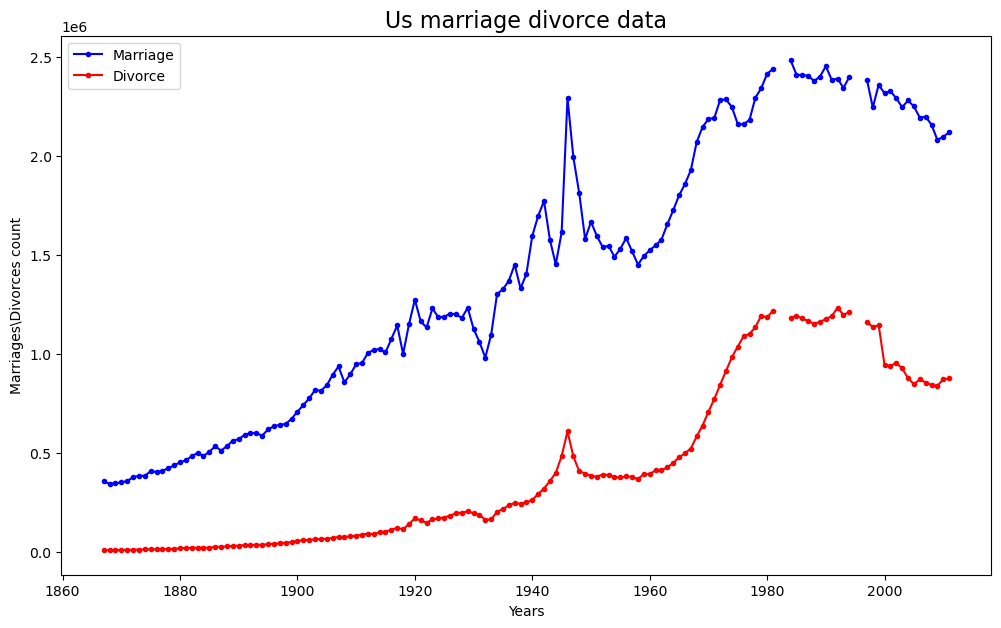

In [22]:
import matplotlib.pyplot as plt                  
import numpy as np
import pandas as pd


marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')          # Data from this file
plt.figure(figsize=(12,7))
plt.title('Us marriage divorce data', fontdict={'fontsize': 16})
plt.plot(marriage_divorce_data.Year, marriage_divorce_data.Marriages, 'b.-', label='Marriage')
plt.plot(marriage_divorce_data.Year, marriage_divorce_data.Divorces, 'r.-', label='Divorce')
plt.xlabel('Years')
plt.ylabel('Marriages\Divorces count')
plt.legend()
plt.savefig('Us marriage divorce data.png', dpi=200)
plt.show()

# QUESTION 7


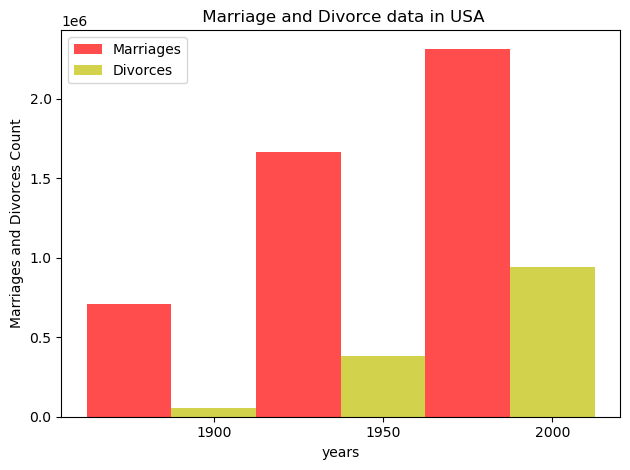

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divorce_data = divorce_data[
    divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]          # Row selection

years = tuple(divorce_data['Year'].values.tolist())                         # Displaying in tuples

marriages = tuple(divorce_data['Marriages'].values.tolist())
divorces= tuple(divorce_data['Divorces'].values.tolist())

n_groups = 3                                                                # Creating plots

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.7

res1 = plt.bar(index, marriages, bar_width,
alpha=opacity,
color='r',
label='Marriages')

res2 = plt.bar(index + bar_width, divorces, bar_width,
alpha=opacity,
color='y',
label='Divorces')

plt.xlabel('years')
plt.ylabel('Marriages and Divorces Count')
plt.title(' Marriage and Divorce data in USA')
plt.xticks(index + bar_width, (1900, 1950, 2000))
plt.legend()

plt.tight_layout()
plt.show()

# QUESTION 8

In [24]:
import pandas as pd
import seaborn as sns

deadliest_actors = pd.read_csv('actor_kill_counts.csv')

res1 = sns.barplot(x='Count', y='Actor', data=act, order=act.sort_values('Count', ascending=True).Actor)
res1.set_xlabel('Number of kills')
res1.set_ylabel('Actor')
res1.set_title("Deadliest actors in Hollywood", size=12)


NameError: name 'act' is not defined

Text(0.5, 1.0, 'Roman Emperors assasssinated')

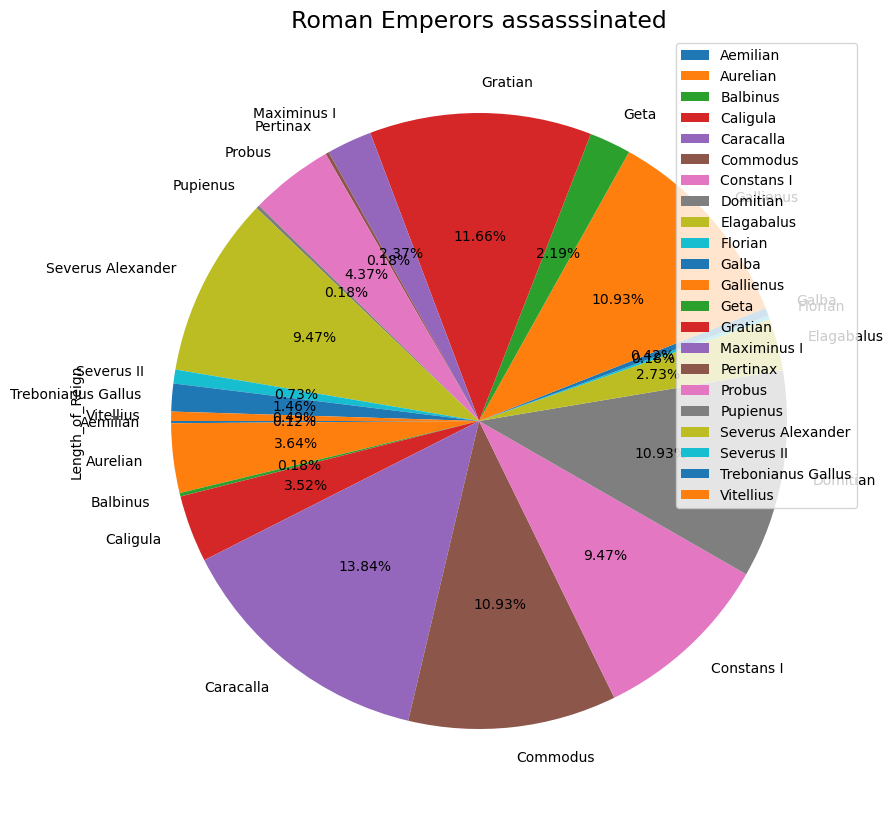

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

roman = pd.read_csv('roman-emperor-reigns.csv')
romans= roman.loc[(roman['Cause_of_Death']=='Assassinated')]

romans
romans.groupby(['Emperor']).sum().plot(kind='pie', subplots=True,startangle=180,figsize=(15,10), autopct='%2.2f%%')
plt.title("Roman Emperors assasssinated", fontsize=17)

Text(0.5, 1.0, 'Relationship between the total revenue earned and the number of Computer Science PhDs awarded in the U.S.')

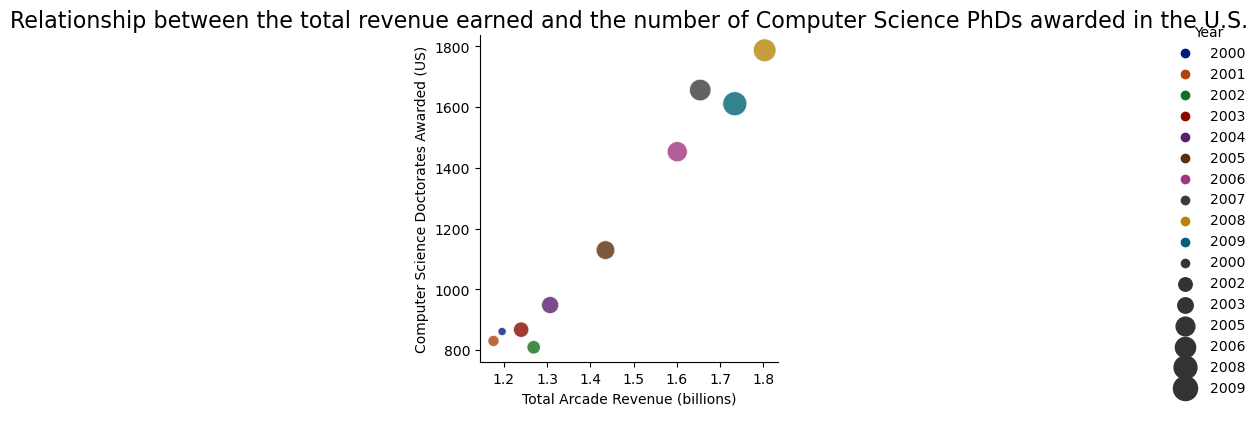

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

arcade=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arcade_rev= arcade.loc[(arcade['Year']>=2000)&(arcade['Year']<=2009)]

seaborn= sns.relplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", size="Year",
            sizes=(35, 300), alpha=.8, palette="dark",
            height=4, data=arcade)
plt.title("Relationship between the total revenue earned and the number of Computer Science PhDs awarded in the U.S.", fontsize=16)